In [303]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# Description of existing features

In [304]:
# Load Dataset
df_regular_route_definitions = pd.read_csv('/kaggle/input/db-regio-dataset/regular_route_definitions.csv')
df_regular_travel = pd.read_csv('/kaggle/input/db-regio-dataset/regular_travel.csv', parse_dates=['date'])
df_regular_travel_test = pd.read_csv('/kaggle/input/db-regio-dataset/regular_travel_test.csv', parse_dates=['date'])
df_bus_stops = pd.read_csv('/kaggle/input/db-regio-dataset/bus_stops.csv')
df_regular_travel_raw = pd.read_csv('/kaggle/input/db-regio-dataset/regular_travel_raw.csv', parse_dates=['datetime'])
df_wdw_queries = pd.read_csv('/kaggle/input/db-regio-dataset/wdw_queries.csv')
df_on_demand_travel_raw = pd.read_csv('/kaggle/input/db-regio-dataset/on_demand_travel_raw.csv', parse_dates=['datetime'])
df_on_demand_travel_test = pd.read_csv('/kaggle/input/db-regio-dataset/on_demand_travel_test.csv', parse_dates=['date'])
df_on_demand_travel = pd.read_csv('/kaggle/input/db-regio-dataset/on_demand_travel.csv', parse_dates=['date'])

## regular_route_definitions.csv

In [305]:
df_regular_route_definitions.head()

,Haltestellenname,route,name_sanitized
0,"Erlau, Feuerwehrhaus",6101,"Erlau, Feuerwehrhaus"
1,"Passau, Hbf",6101,"Passau, Hbf"
2,"Passau, Am Schanzlturm",6101,"Passau, Am Schanzlturm"
3,"Passau, Nagelschmiedgasse",6101,"Passau, Nagelschmiedgasse"
4,"Passau, Rathaus",6101,"Passau, Rathaus"


In [306]:
df_regular_route_definitions.nunique()

Haltestellenname    1395
route                 69
name_sanitized      1395
dtype: int64

## regular_travel.csv

In [307]:
df_regular_travel.head()

,date,EZone,hour,Passengers
0,2019-01-01,"15964 - Salzweg, Außenstelle LRA",0,0.0
1,2019-01-01,"15964 - Salzweg, Außenstelle LRA",1,0.0
2,2019-01-01,"15964 - Salzweg, Außenstelle LRA",2,0.0
3,2019-01-01,"15964 - Salzweg, Außenstelle LRA",3,0.0
4,2019-01-01,"15964 - Salzweg, Außenstelle LRA",4,0.0


In [308]:
df_regular_travel['EZone'].nunique()  # bus stops

50

==> We have 50 bus stops in the data

In [309]:
print("Starting date")
print(df_regular_travel['date'].min())
print("Ending date")
print(df_regular_travel['date'].max())

Starting date
2019-01-01 00:00:00
Ending date
2019-12-16 00:00:00


In [310]:
df_regular_travel.tail()

,date,EZone,hour,Passengers
419995,2019-12-16,"9750 - Passau, Reisebüro Niedermayer",19,NaN
419996,2019-12-16,"9750 - Passau, Reisebüro Niedermayer",20,NaN
419997,2019-12-16,"9750 - Passau, Reisebüro Niedermayer",21,NaN
419998,2019-12-16,"9750 - Passau, Reisebüro Niedermayer",22,NaN
419999,2019-12-16,"9750 - Passau, Reisebüro Niedermayer",23,NaN


In [311]:
from datetime import datetime
print("Difference between ending and starting date in days")
diffDays = (df_regular_travel['date'].max() - df_regular_travel['date'].min()).days
diffSeconds = (df_regular_travel['date'].max() - df_regular_travel['date'].min()).seconds
print(diffDays)
print("Difference between ending and starting date in hours")
diffHours = diffDays * 24 + diffSeconds // 3600
print(diffHours)
print("Total number of rows in the dataframe")
df_regular_travel.shape


Difference between ending and starting date in days
349
Difference between ending and starting date in hours
8376
Total number of rows in the dataframe


(420000, 4)

In [312]:
df_regular_travel.groupby('EZone')['hour'].count()

EZone
15964 - Salzweg, Außenstelle LRA         8400
4000 - Passau, Hbf                       8400
4001 - Passau, Kl. Exerzierplatz         8400
4010 - Passau, Am Schanzl(Busbucht)      8400
4016 - Passau, Römerplatz                8400
4028 - Passau, Nagelschmiedgasse         8400
4029 - Passau, Rathaus                   8400
4030 - Passau, Am Schanzlturm            8400
4100 - Pocking, Bahnhof                  8400
4111 - Pocking, Rathaus                  8400
4120 - Bad Füssing, Füssinger Hof        8400
4146 - Ortenburg, Marktplatz             8400
4150 - Bad Griesbach, Stadtplatz         8400
4170 - Bad Griesbach-Therme,Parkhotel    8400
4200 - Vilshofen, Bahnhof                8400
4214 - Dommelstadl                       8400
4220 - Neuhaus a. Inn, Kriegerdenkmal    8400
4225 - Hartkirchen, Mariensäule          8400
4306 - Bad Füssing, Kath. Kirche         8400
4380 - Fürstenzell, MVZ                  8400
4382 - Fürstenzell, Marktplatz           8400
4471 - Aldersbach, Pfarrgart

## bus_stops.csv

In [313]:
df_bus_stops.head()

,Nummer,name_sanitized,long,lat,Name,Kürzel
0,4972,"Fürsteneck, Abzw Bf",13.470781,48.717882,"Fürsteneck, Abzw Bf",PFAB
1,4792,"Fürsteneck, Metzgerei Stegbauer",13.461119,48.720970,"Fürsteneck, Metzgerei Stegbauer",4792
2,4320,Voglöd bei Prag,13.472936,48.714230,Voglöd bei Prag,PVOG
3,4887,"Guttenhofen, Abzw",13.527810,48.714984,"Guttenhofen, Abzw",PAGH
4,4429,"Künzing, Römerbad Quintana",13.095707,48.667151,"Künzing, Römerbad Quintana",4429


* Nummer: unique identifier for each bus stop
* name_sanitized: cleaned up name for fusion with other data, e.g. regular_route_definitions.csv
* long: longitude
* lat: latitude
* Name: original Name
* Kürzel: Abbreviation for Name if available, Nummer if not

In [314]:
df_bus_stops['Nummer'].nunique()

1309

## on_demand_travel

In [315]:
df_on_demand_travel.head()

,date,EZone,hour,Passengers
0,2019-01-01,"Brand, Ort",0,0.0
1,2019-01-01,"Brand, Ort",1,0.0
2,2019-01-01,"Brand, Ort",2,0.0
3,2019-01-01,"Brand, Ort",3,0.0
4,2019-01-01,"Brand, Ort",4,0.0


* date: Day of ticket sales.
* EZone: Bus stop that the tickets were obtained at, e.g. point of departure (Einstiegszone).
* Passengers: Number of passengers that bought tickets. This is the prediction target. It is set to None if the row is a test sample.

In [316]:
df_on_demand_travel['EZone'].nunique()

50

In [317]:
df_on_demand_travel.groupby('EZone')['hour'].count()

EZone
Brand, Ort                                8760
Bärnau, Marktplatz                        8760
Deggendorf, Busbahnhof                    8760
Deggendorf, Hauptbahnhof                  8760
Deggendorf, Stadtplatz                    8760
Eging, Postamt                            8760
Erbendorf, Kriegerdenkmal                 8760
Fürstenstein, Raiffeisenbank              8760
Grünlas                                   8760
Hengersberg, Marktplatz                   8760
Hof, Bergstr. (Busbahnhof)                8760
Hof, Hauptbahnhof                         8760
Kemnath, Bayreuther Str. Mitfahrerbank    8760
Kemnath, Primianusplatz                   8760
Kemnath-Neustadt, Bf                      8760
Konnersreuth, Pfr.-Naber-Platz            8760
Krummennaab, Kirche                       8760
Lauterhofen, Bf                           8760
Marktredwitz, Bahnhof                     8760
Marktredwitz, Neues Rathaus/KEC           8760
Mitterteich, Abzw Martinsklause           8760
Mittert

In [318]:
df_on_demand_travel.shape

(438000, 4)

In [319]:
df_on_demand_travel.tail()

,date,EZone,hour,Passengers
437995,2019-12-31,"Wiesau, Bf ANKUNFT",19,0.0
437996,2019-12-31,"Wiesau, Bf ANKUNFT",20,0.0
437997,2019-12-31,"Wiesau, Bf ANKUNFT",21,0.0
437998,2019-12-31,"Wiesau, Bf ANKUNFT",22,0.0
437999,2019-12-31,"Wiesau, Bf ANKUNFT",23,0.0


In [320]:
df_on_demand_travel.isnull().sum()

date               0
EZone              0
hour               0
Passengers    109200
dtype: int64

## regular_travel_raw.csv
Data used to generate the regular_travel.csv.

In [321]:
df_regular_travel_raw.head()

,EZone,AZone,Route,Trip,Date,Time,Passengers,datetime
0,5657 - Sonnen,"5425 - Breitenberg, Passauer-Str.",10,0,2019-09-09 00:00:00,12:57:10,1,2019-09-09 12:57:10
1,"5395 - Untergriesbach, West","4000 - Passau, Hbf",6101,23,2019-01-01 00:00:00,17:33:27,1,2019-01-01 17:33:27
2,5401 - Wildenranna,"4000 - Passau, Hbf",6101,23,2019-01-01 00:00:00,17:24:40,1,2019-01-01 17:24:40
3,"5444 - Wegscheid, Rathaus","4000 - Passau, Hbf",6101,23,2019-01-01 00:00:00,17:20:05,1,2019-01-01 17:20:05
4,"5444 - Wegscheid, Rathaus","4000 - Passau, Hbf",6101,23,2019-01-01 00:00:00,17:14:09,1,2019-01-01 17:14:09


In [322]:
df_regular_travel_raw.tail()

,EZone,AZone,Route,Trip,Date,Time,Passengers,datetime
309130,"4000 - Passau, Hbf","5444 - Wegscheid, Rathaus",9890,12,2019-08-12 00:00:00,00:20:09,1,2019-12-08 00:20:09
309131,"11142 - Passau, Klinikum","4120 - Bad Füssing, Füssinger Hof",9890,20,2019-12-14 00:00:00,00:35:03,1,2019-12-14 00:35:03
309132,"4001 - Passau, Kl. Exerzierplatz","4100 - Pocking, Bahnhof",9890,20,2019-12-14 00:00:00,00:29:06,1,2019-12-14 00:29:06
309133,"4001 - Passau, Kl. Exerzierplatz",4214 - Dommelstadl,9890,20,2019-12-14 00:00:00,00:28:39,1,2019-12-14 00:28:39
309134,"4000 - Passau, Hbf","4416 - Schalding r. d. Do., Bahnsteg",9890,42,2019-12-15 00:00:00,00:32:17,1,2019-12-15 00:32:17


## regular_travel

In [323]:
df_regular_travel.head()

,date,EZone,hour,Passengers
0,2019-01-01,"15964 - Salzweg, Außenstelle LRA",0,0.0
1,2019-01-01,"15964 - Salzweg, Außenstelle LRA",1,0.0
2,2019-01-01,"15964 - Salzweg, Außenstelle LRA",2,0.0
3,2019-01-01,"15964 - Salzweg, Außenstelle LRA",3,0.0
4,2019-01-01,"15964 - Salzweg, Außenstelle LRA",4,0.0


In [324]:
df_regular_travel.shape

(420000, 4)

In [325]:
df_regular_travel.describe()

,hour,Passengers
count,420000.000000,310800.000000
mean,11.500000,0.524472
std,6.922195,1.743260
min,0.000000,0.000000
25%,5.750000,0.000000
50%,11.500000,0.000000
75%,17.250000,0.000000
max,23.000000,46.000000


### Merge test data to training data

In [326]:
# drop nan columns
df_regular_travel = df_regular_travel[df_regular_travel['Passengers'].notna()]
df_regular_travel = pd.concat([df_regular_travel_test.assign(ind="test"), df_regular_travel.assign(ind="train")])
df_regular_travel.tail()

,date,EZone,hour,Passengers,ind
411595,2019-12-09,"9750 - Passau, Reisebüro Niedermayer",19,0.0,train
411596,2019-12-09,"9750 - Passau, Reisebüro Niedermayer",20,0.0,train
411597,2019-12-09,"9750 - Passau, Reisebüro Niedermayer",21,0.0,train
411598,2019-12-09,"9750 - Passau, Reisebüro Niedermayer",22,0.0,train
411599,2019-12-09,"9750 - Passau, Reisebüro Niedermayer",23,0.0,train


In [327]:
df_regular_travel.sort_values(by='date', ascending=True, inplace=True)
df_regular_travel = df_regular_travel.reset_index(drop=True)

In [328]:
# drop nan columns
df_on_demand_travel = df_on_demand_travel[df_on_demand_travel['Passengers'].notna()]
df_on_demand_travel = pd.concat([df_on_demand_travel_test.assign(ind="test"), df_on_demand_travel.assign(ind="train")])
df_on_demand_travel.tail()

,date,EZone,hour,Passengers,ind
437995,2019-12-31,"Wiesau, Bf ANKUNFT",19,0.0,train
437996,2019-12-31,"Wiesau, Bf ANKUNFT",20,0.0,train
437997,2019-12-31,"Wiesau, Bf ANKUNFT",21,0.0,train
437998,2019-12-31,"Wiesau, Bf ANKUNFT",22,0.0,train
437999,2019-12-31,"Wiesau, Bf ANKUNFT",23,0.0,train


In [330]:
df_on_demand_travel.sort_values(by='date', ascending=True, inplace=True)
df_on_demand_travel = df_on_demand_travel.reset_index(drop=True)

## on_demand_travel_raw
This is the data used to generate on_demand_travel.csv.

In [331]:
df_on_demand_travel_raw.head()

,Date,Departure,Route,FahrtIP,Time,AZone,EZone,Passengers,datetime
0,2019-01-01 00:00:00,07:10,6356,6356302,07:00,"Neutauperlitz, Neutauperlitzer Str.","Hof, Bergstr. (Busbahnhof)",1,2019-01-01 07:00:00
1,2019-01-01 00:00:00,07:27,8214,8214015,06:50,"Viechtach, Mönchshofstr. Rathaus","Oberschlatzendorf, Gewgb. Rehau",1,2019-01-01 06:50:00
2,2019-01-01 00:00:00,08:43,8231,8231013,08:30,"Hengersberg, Marktplatz","Deggendorf, Hauptbahnhof",1,2019-01-01 08:30:00
3,2019-01-01 00:00:00,08:53,8313,8313301,08:30,"Mitterteich, Abzw Martinsklause","Marktredwitz, Bahnhof",1,2019-01-01 08:30:00
4,2019-01-01 00:00:00,09:01,8320,8320205,09:00,"Tirschenreuth, Landratsamt","Tirschenreuth, Krankenhaus",1,2019-01-01 09:00:00


## wdw_queries

In [241]:
df_wdw_queries.head()

,created_at,travel_at,from_place,to_place
0,01.01.2019 10:34,01.01.2019 19:00,Passau,Salzweg
1,01.01.2019 10:35,02.01.2019 06:46,Passau,Salzweg
2,01.01.2019 10:35,01.01.2019 17:20,Passau,Salzweg
3,01.01.2019 11:57,02.01.2019 05:57,Wegscheid,Passau
4,01.01.2019 11:57,02.01.2019 05:37,Wegscheid,Passau


# Sales Distribution

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2681: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  color=hist_color, **hist_kws)


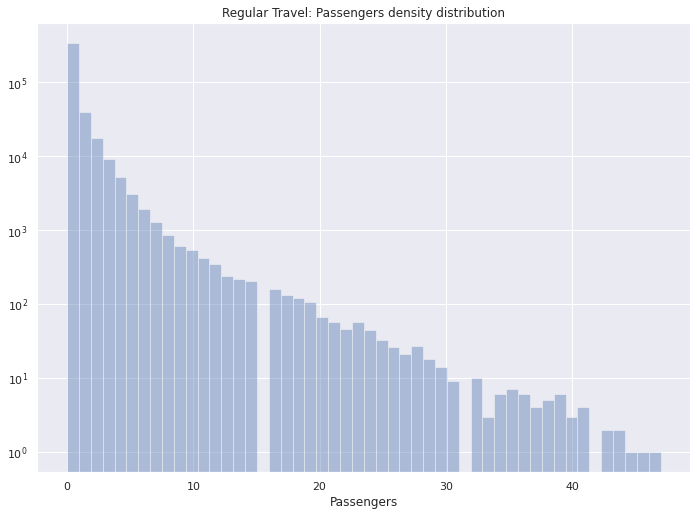

In [332]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_regular_travel['Passengers'], kde=False, hist_kws={'log':True}).set(title='Regular Travel: Passengers density distribution');

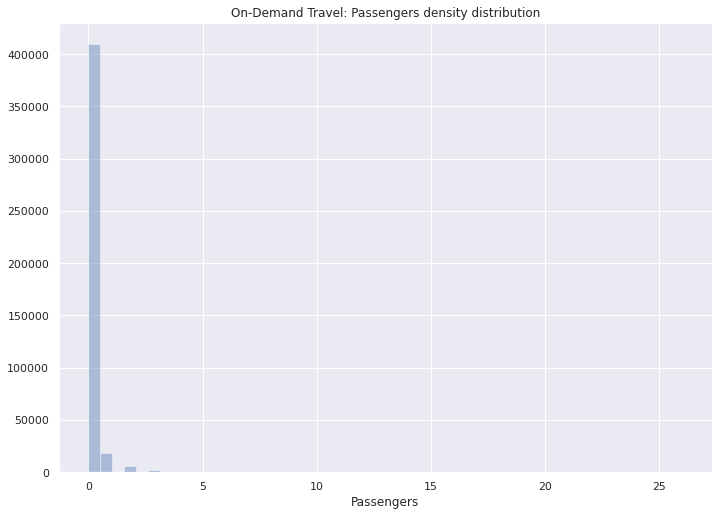

In [333]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_on_demand_travel['Passengers'], kde=False).set(title='On-Demand Travel: Passengers density distribution');

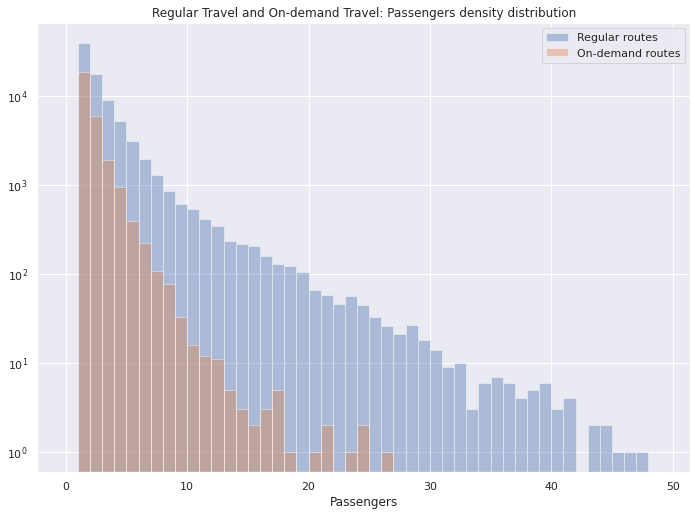

In [334]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_regular_travel['Passengers'], bins=range(1, 50, 1), kde=False, hist_kws={'log':True}, label="Regular routes")
sns.distplot(df_on_demand_travel['Passengers'], bins=range(1, 50, 1), kde=False, hist_kws={'log':True}, label="On-demand routes")
ax.set_title('Regular Travel and On-demand Travel: Passengers density distribution');
ax.legend()

The dataset is very skewed close to 0

In [335]:
print("Percentage of rows having 0 passenger for regular routes  = ", (df_regular_travel[df_regular_travel['Passengers'] == 0].count() * 100) / df_regular_travel.count())

Percentage of rows having 0 passenger for regular routes  =  date          80.47381
EZone         80.47381
hour          80.47381
Passengers    80.47381
ind           80.47381
dtype: float64


In [336]:
print("Percentage of rows having 0 passenger for on-demand routes = ", (df_on_demand_travel[df_on_demand_travel['Passengers'] == 0].count() * 100) / df_on_demand_travel.count())

Percentage of rows having 0 passenger for on-demand routes =  date          93.489954
EZone         93.489954
hour          93.489954
Passengers    93.489954
ind           93.489954
dtype: float64


# Sales pattern on a Daily basis

In [337]:
df_regular_travel

,date,EZone,hour,Passengers,ind
0,2019-01-01,"9750 - Passau, Reisebüro Niedermayer",21,0.0,train
1,2019-01-01,"4815 - Büchlberg, BBW",9,0.0,train
2,2019-01-01,"4815 - Büchlberg, BBW",8,0.0,train
3,2019-01-01,"4815 - Büchlberg, BBW",7,0.0,train
4,2019-01-01,"4815 - Büchlberg, BBW",6,0.0,train
...,...,...,...,...,...
419995,2019-12-16,"4220 - Neuhaus a. Inn, Kriegerdenkmal",12,0.0,test
419996,2019-12-16,"4220 - Neuhaus a. Inn, Kriegerdenkmal",11,0.0,test
419997,2019-12-16,"4220 - Neuhaus a. Inn, Kriegerdenkmal",10,0.0,test
419998,2019-12-16,"4220 - Neuhaus a. Inn, Kriegerdenkmal",8,0.0,test


In [338]:
df_on_demand_travel.isnull().sum()

date          0
EZone         0
hour          0
Passengers    0
ind           0
dtype: int64

In [339]:
# df_regular_travel['Passengers_Daily_Count'] = df_regular_travel.groupby('date')['Passengers'].count()
# df_regular_travel
df_regular_travel.groupby('date')['Passengers'].agg('sum')

date
2019-01-01     74.0
2019-01-02    691.0
2019-01-03    644.0
2019-01-04    602.0
2019-01-05    280.0
              ...  
2019-12-12    688.0
2019-12-13    567.0
2019-12-14    232.0
2019-12-15     33.0
2019-12-16     22.0
Name: Passengers, Length: 350, dtype: float64

<AxesSubplot:xlabel='date', ylabel='Passengers'>

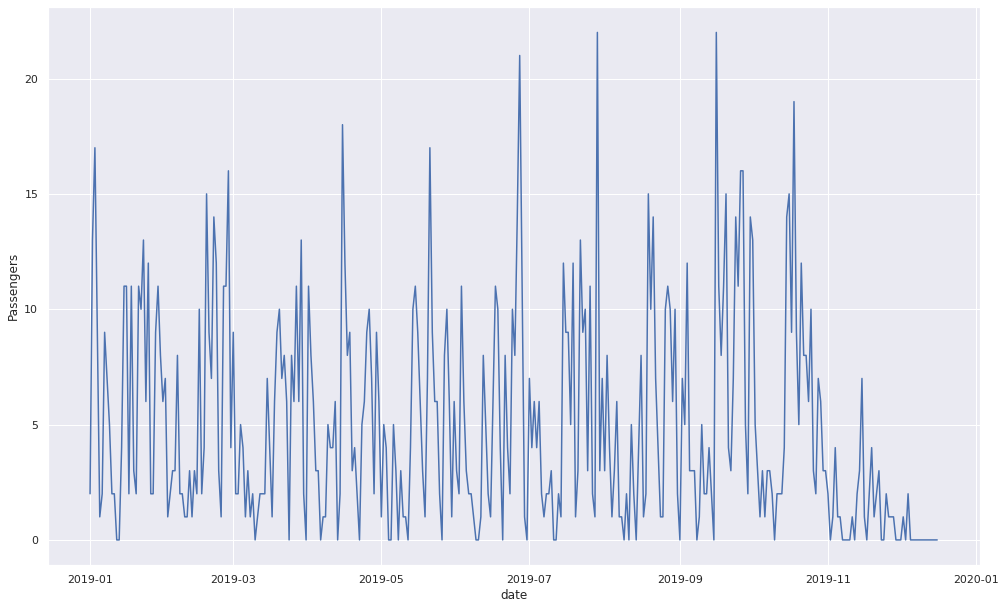

In [340]:
# Time series for "15964 - Salzweg, Außenstelle LRA" bus stop
sns.set(rc={'figure.figsize':(16.7,10.27)})
df_regular_travel_1 = df_regular_travel[df_regular_travel['EZone'] == "15964 - Salzweg, Außenstelle LRA"]
sns.lineplot(x = df_regular_travel_1.groupby('date')['Passengers'].agg('sum').index, y = df_regular_travel_1.groupby('date')['Passengers'].agg('sum'))

<AxesSubplot:xlabel='date', ylabel='Passengers'>

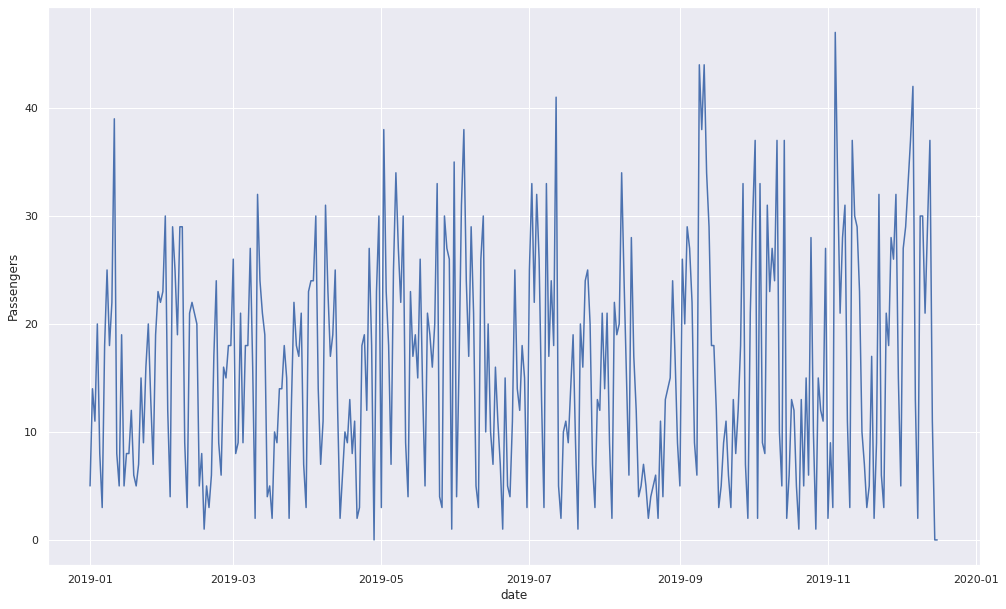

In [341]:
# Time series for "9750 - Passau, Reisebüro Niedermayer" bus stop
sns.set(rc={'figure.figsize':(16.7,10.27)})
df_regular_travel_1 = df_regular_travel[df_regular_travel['EZone'] == "9750 - Passau, Reisebüro Niedermayer"]
sns.lineplot(x = df_regular_travel_1.groupby('date')['Passengers'].agg('sum').index, y = df_regular_travel_1.groupby('date')['Passengers'].agg('sum'))

In [342]:
# sns.set(rc={'figure.figsize':(30.7,14)})
# df_regular_travel['month'] = df_regular_travel['date'].apply(lambda date: date.month)
# df_regular_travel_1 = df_regular_travel[df_regular_travel['month'] == 1]
# sns.lineplot(x = df_regular_travel_1['date'], y = df_regular_travel_1['Passengers'].fillna(0), estimator=None, hue=df_regular_travel_1['EZone']).set(title='Regular Travel: Passenger volume variation during January');

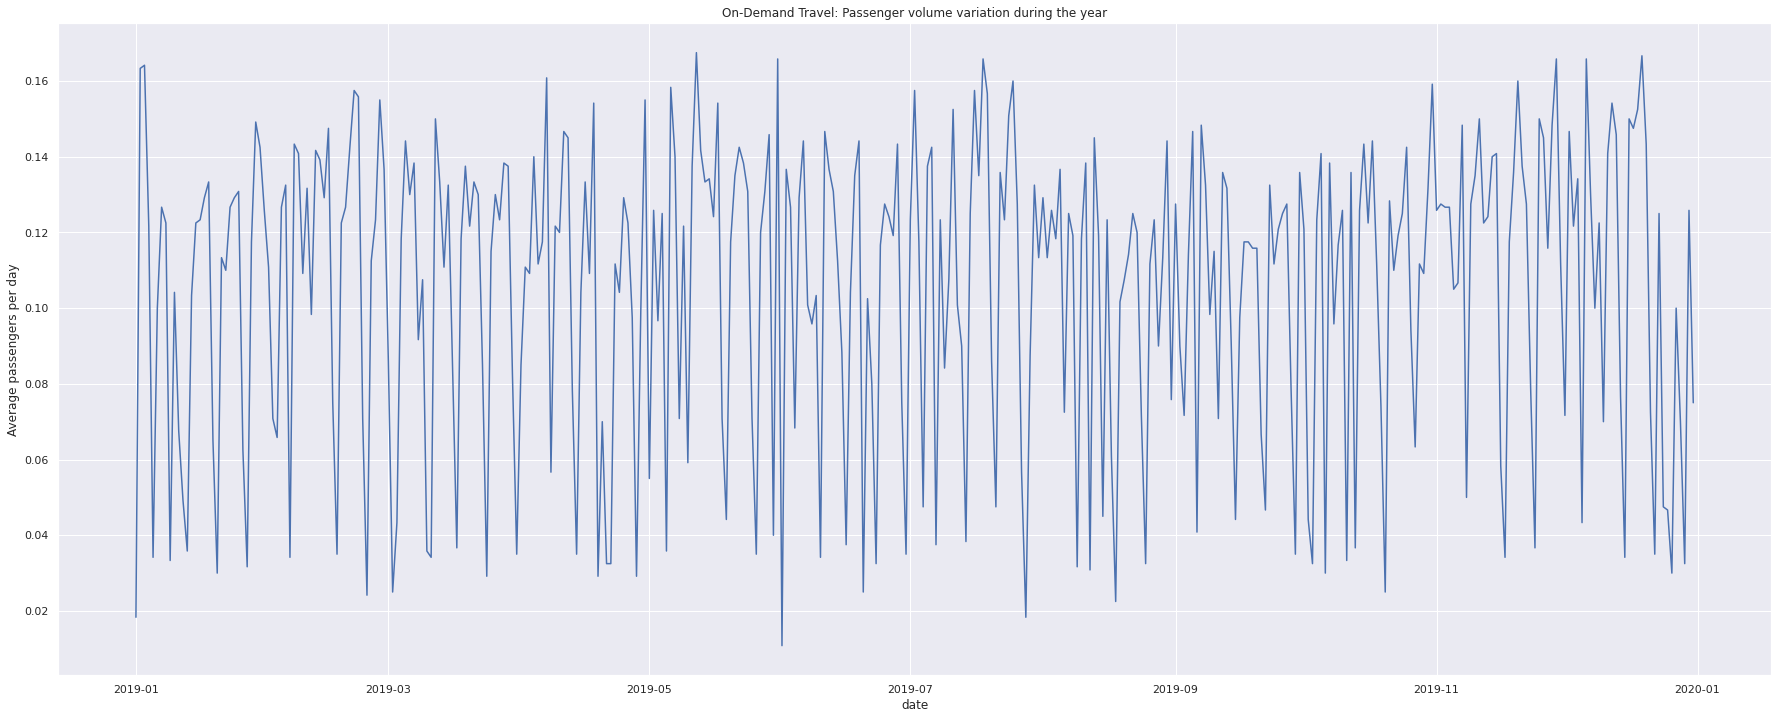

In [343]:
sns.set(rc={'figure.figsize':(30.7,12)})
df_on_demand_travel['month'] = df_on_demand_travel['date'].apply(lambda date: date.month)
df_on_demand_travel['Average passengers per day'] = df_on_demand_travel.groupby(['date'])['Passengers'].transform('mean')
# df_on_demand_travel_1 = df_on_demand_travel[df_on_demand_travel['month'] == 1]
sns.lineplot(x = df_on_demand_travel['date'], y = df_on_demand_travel['Average passengers per day'].fillna(0), estimator=None, err_style='bars').set(title='On-Demand Travel: Passenger volume variation during the year');

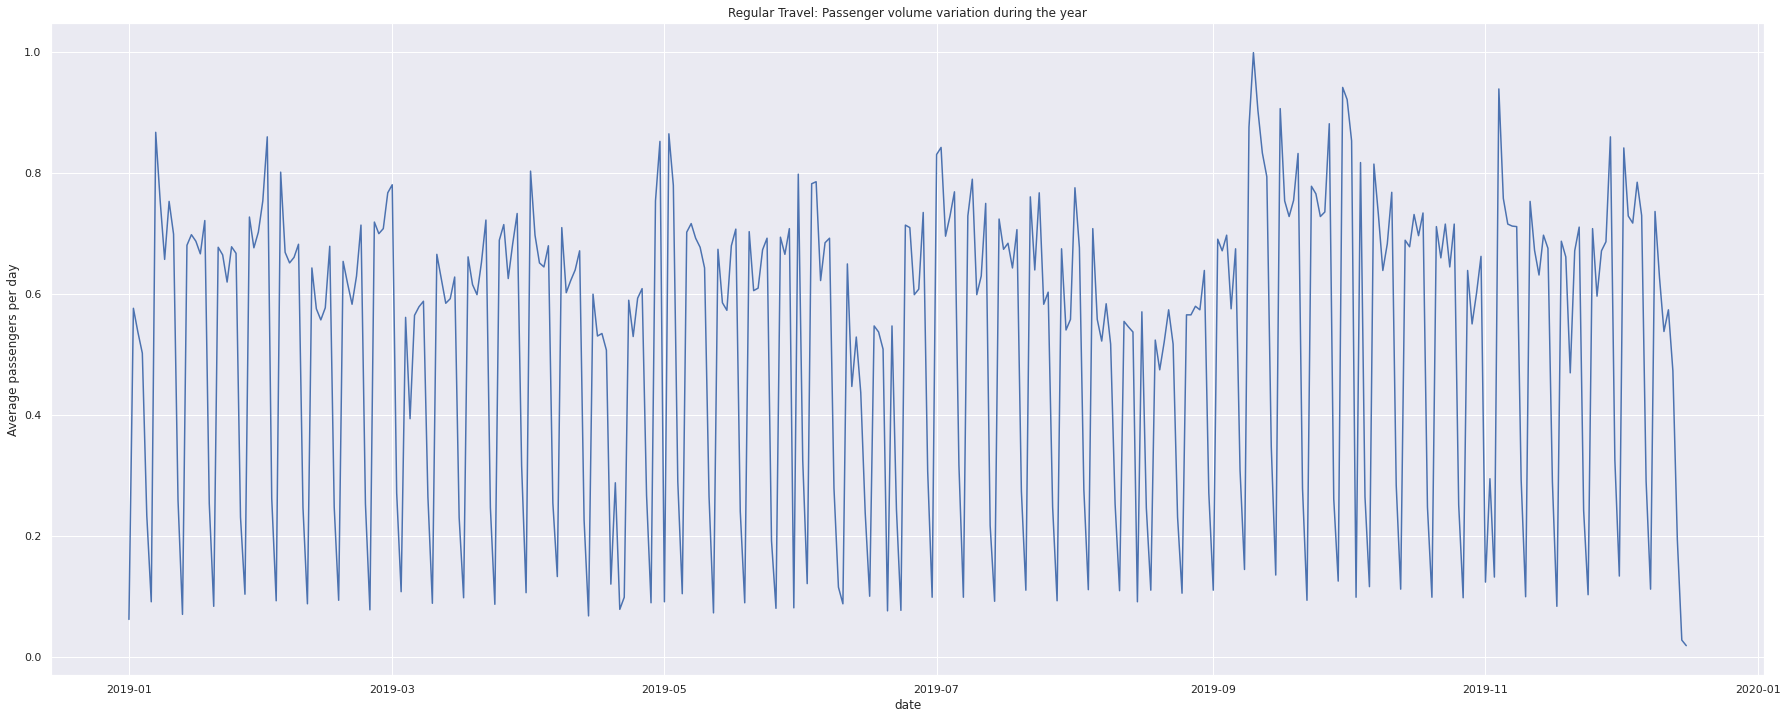

In [344]:
sns.set(rc={'figure.figsize':(30.7,12)})
df_regular_travel['month'] = df_regular_travel['date'].apply(lambda date: date.month)
df_regular_travel['Average passengers per day'] = df_regular_travel.groupby(['date'])['Passengers'].transform('mean')
# df_on_demand_travel_1 = df_on_demand_travel[df_on_demand_travel['month'] == 1]
sns.lineplot(x = df_regular_travel['date'], y = df_regular_travel['Average passengers per day'].fillna(0), estimator=None).set(title='Regular Travel: Passenger volume variation during the year');

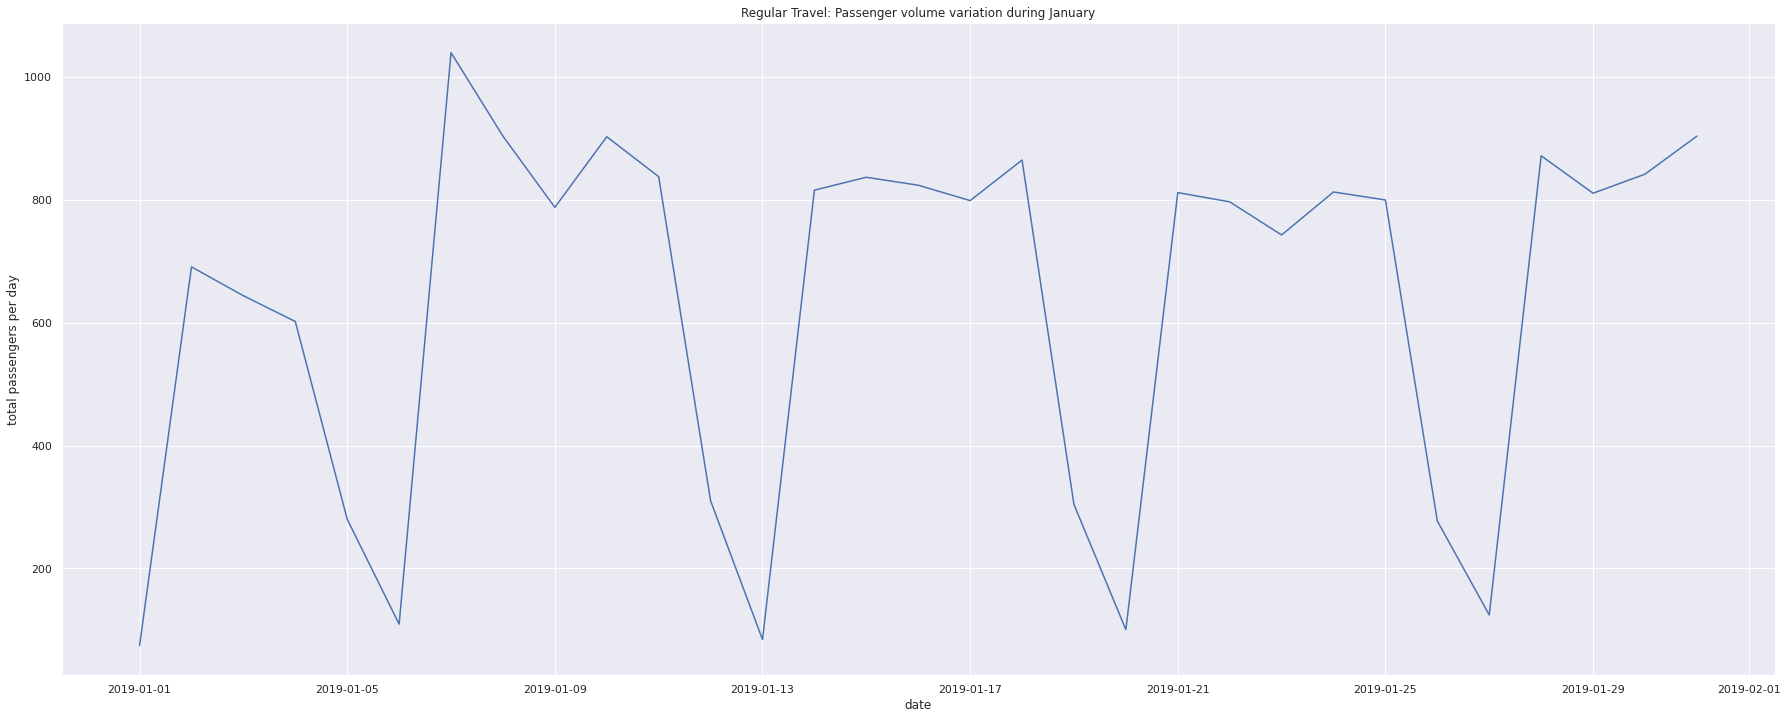

In [345]:
sns.set(rc={'figure.figsize':(30.7,12)})
df_regular_travel['month'] = df_regular_travel['date'].apply(lambda date: date.month)
df_regular_travel['total passengers per day'] = df_regular_travel.groupby(['date'])['Passengers'].transform('sum')
df_regular_travel_1 = df_regular_travel[df_regular_travel['month'] == 1]
sns.lineplot(x = df_regular_travel_1['date'], y = df_regular_travel_1['total passengers per day'].fillna(0), estimator=None).set(title='Regular Travel: Passenger volume variation during January');

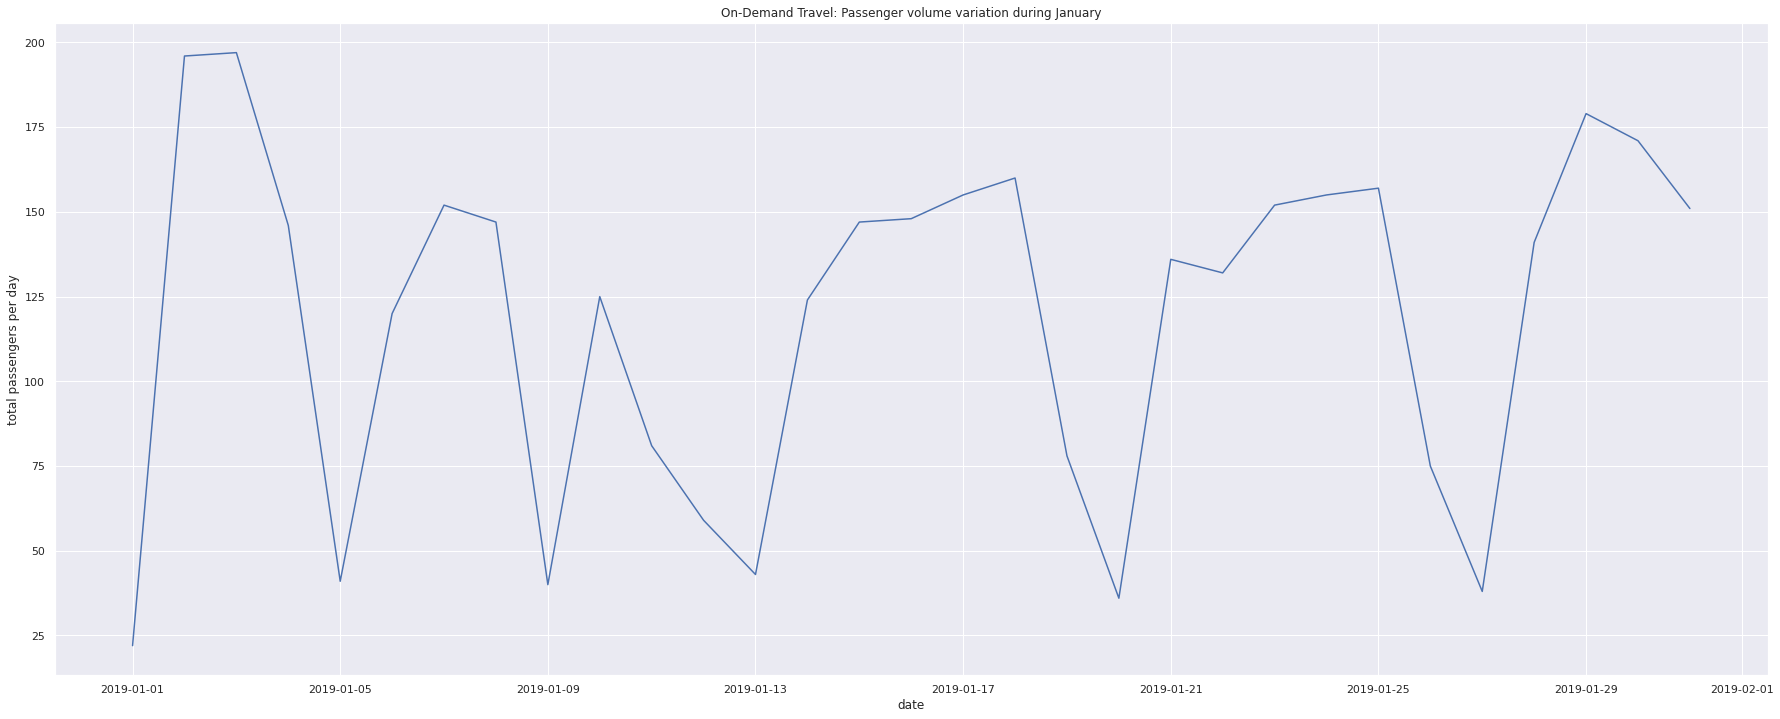

In [346]:
sns.set(rc={'figure.figsize':(30.7,12)})
df_on_demand_travel['month'] = df_on_demand_travel['date'].apply(lambda date: date.month)
df_on_demand_travel['total passengers per day'] = df_on_demand_travel.groupby(['date'])['Passengers'].transform('sum')
df_on_demand_travel_1 = df_on_demand_travel[df_on_demand_travel['month'] == 1]
sns.lineplot(x = df_on_demand_travel_1['date'], y = df_on_demand_travel_1['total passengers per day'].fillna(0), estimator=None).set(title='On-Demand Travel: Passenger volume variation during January');

# Sales pattern on a Monthly basis

In [347]:
# Add month column
df_regular_travel['month'] = df_regular_travel['date'].apply(lambda date: date.month)
df_regular_travel

,date,EZone,hour,Passengers,ind,month,Average passengers per day,total passengers per day
0,2019-01-01,"9750 - Passau, Reisebüro Niedermayer",21,0.0,train,1,0.061667,74.0
1,2019-01-01,"4815 - Büchlberg, BBW",9,0.0,train,1,0.061667,74.0
2,2019-01-01,"4815 - Büchlberg, BBW",8,0.0,train,1,0.061667,74.0
3,2019-01-01,"4815 - Büchlberg, BBW",7,0.0,train,1,0.061667,74.0
4,2019-01-01,"4815 - Büchlberg, BBW",6,0.0,train,1,0.061667,74.0
...,...,...,...,...,...,...,...,...
419995,2019-12-16,"4220 - Neuhaus a. Inn, Kriegerdenkmal",12,0.0,test,12,0.018333,22.0
419996,2019-12-16,"4220 - Neuhaus a. Inn, Kriegerdenkmal",11,0.0,test,12,0.018333,22.0
419997,2019-12-16,"4220 - Neuhaus a. Inn, Kriegerdenkmal",10,0.0,test,12,0.018333,22.0
419998,2019-12-16,"4220 - Neuhaus a. Inn, Kriegerdenkmal",8,0.0,test,12,0.018333,22.0


In [348]:
# # Time series for "9750 - Passau, Reisebüro Niedermayer" bus stop
# sns.set(rc={'figure.figsize':(16.7,10.27)})
# df_regular_travel_1 = df_regular_travel[df_regular_travel['EZone'] == "9750 - Passau, Reisebüro Niedermayer"]
# df_regular_travel_2 = df_regular_travel[df_regular_travel['EZone'] == "15964 - Salzweg, Außenstelle LRA"]
# df_regular_travel_3 = df_regular_travel[df_regular_travel['EZone'] == "4000 - Passau, Hbf"]
# df_regular_travel_4 = df_regular_travel[df_regular_travel['EZone'] == "4029 - Passau, Rathaus"]

# fig, ax = plt.subplots()
# ax = sns.lineplot(x = df_regular_travel_1.groupby('month')['Passengers'].agg('sum').index, y = df_regular_travel_1.groupby('month')['Passengers'].agg('sum'), label= '9750 - Passau, Reisebüro Niedermayer')
# ax1 = sns.lineplot(x = df_regular_travel_2.groupby('month')['Passengers'].agg('sum').index, y = df_regular_travel_2.groupby('month')['Passengers'].agg('sum'), label= '15964 - Salzweg, Außenstelle LRA')
# ax2 = sns.lineplot(x = df_regular_travel_3.groupby('month')['Passengers'].agg('sum').index, y = df_regular_travel_3.groupby('month')['Passengers'].agg('sum'), label= 'Passau, Hbf')
# ax3 = sns.lineplot(x = df_regular_travel_4.groupby('month')['Passengers'].agg('sum').index, y = df_regular_travel_4.groupby('month')['Passengers'].agg('sum'), label= '4029 - Passau, Rathau')

# # sns.lineplot(x = "date", y = "Passengers", data = df_regular_travel[df_regular_travel['EZone'] == "15964 - Salzweg, Außenstelle LRA"] )

In [349]:
# # Time series for "9750 - Passau, Reisebüro Niedermayer" bus stop
# sns.set(rc={'figure.figsize':(16.7,10.27)})
# df_regular_travel_1 = df_regular_travel[df_regular_travel['EZone'] == "9750 - Passau, Reisebüro Niedermayer"]
# df_regular_travel_2 = df_regular_travel[df_regular_travel['EZone'] == "15964 - Salzweg, Außenstelle LRA"]
# df_regular_travel_3 = df_regular_travel[df_regular_travel['EZone'] == "4000 - Passau, Hbf"]
# df_regular_travel_4 = df_regular_travel[df_regular_travel['EZone'] == "4029 - Passau, Rathaus"]

# fig, ax = plt.subplots()
# ax = sns.lineplot(x = df_regular_travel_1.groupby('month')['Passengers'].agg('sum').index, y = df_regular_travel_1.groupby('month')['Passengers'].agg('sum'), label= '9750 - Passau, Reisebüro Niedermayer')
# ax1 = sns.lineplot(x = df_regular_travel_2.groupby('month')['Passengers'].agg('sum').index, y = df_regular_travel_2.groupby('month')['Passengers'].agg('sum'), label= '15964 - Salzweg, Außenstelle LRA')
# ax2 = sns.lineplot(x = df_regular_travel_3.groupby('month')['Passengers'].agg('sum').index, y = df_regular_travel_3.groupby('month')['Passengers'].agg('sum'), label= 'Passau, Hbf')
# ax3 = sns.lineplot(x = df_regular_travel_4.groupby('month')['Passengers'].agg('sum').index, y = df_regular_travel_4.groupby('month')['Passengers'].agg('sum'), label= '4029 - Passau, Rathau')

# # sns.lineplot(x = "date", y = "Passengers", data = df_regular_travel[df_regular_travel['EZone'] == "15964 - Salzweg, Außenstelle LRA"] )

In [350]:
df_regular_travel['monthly_sum_ByEZone'] = df_regular_travel.groupby(['month', 'EZone'])['Passengers'].transform('sum')

In [351]:
df_on_demand_travel['monthly_sum_ByEZone'] = df_on_demand_travel.groupby(['month', 'EZone'])['Passengers'].transform('sum')

In [352]:
# sns.set(rc={'figure.figsize':(20.7,17.27)})
# fig, ax = plt.subplots()
# ax = sns.lineplot(x = df_regular_travel[df_regular_travel['month'] == 1]['date'], y = df_regular_travel[df_regular_travel['month'] == 1]['Passengers'].fillna(0), hue= df_regular_travel[df_regular_travel['month'] == 1]['EZone'], estimator=None)


In [353]:
# sns.set(rc={'figure.figsize':(20.7,17.27)})
# fig, ax = plt.subplots()
# ax = sns.lineplot(x = df_regular_travel[df_regular_travel['month'] == 2]['date'], y = df_regular_travel[df_regular_travel['month'] == 2]['Passengers'].fillna(0), hue= df_regular_travel[df_regular_travel['month'] == 2]['EZone'], estimator=None)


In [354]:
# sns.set(rc={'figure.figsize':(20.7,17.27)})
# fig, ax = plt.subplots()
# ax = sns.lineplot(x = df_regular_travel[df_regular_travel['month'] == 3]['date'], y = df_regular_travel[df_regular_travel['month'] == 3]['Passengers'].fillna(0), hue= df_regular_travel[df_regular_travel['month'] == 3]['EZone'], estimator=None)


In [355]:
# sns.set(rc={'figure.figsize':(20.7,17.27)})
# fig, ax = plt.subplots()
# ax = sns.lineplot(x = df_regular_travel[df_regular_travel['month'] == 3]['date'], y = df_regular_travel[df_regular_travel['month'] == 3]['Passengers'].fillna(0), hue= df_regular_travel[df_regular_travel['month'] == 3]['EZone'], estimator=None)

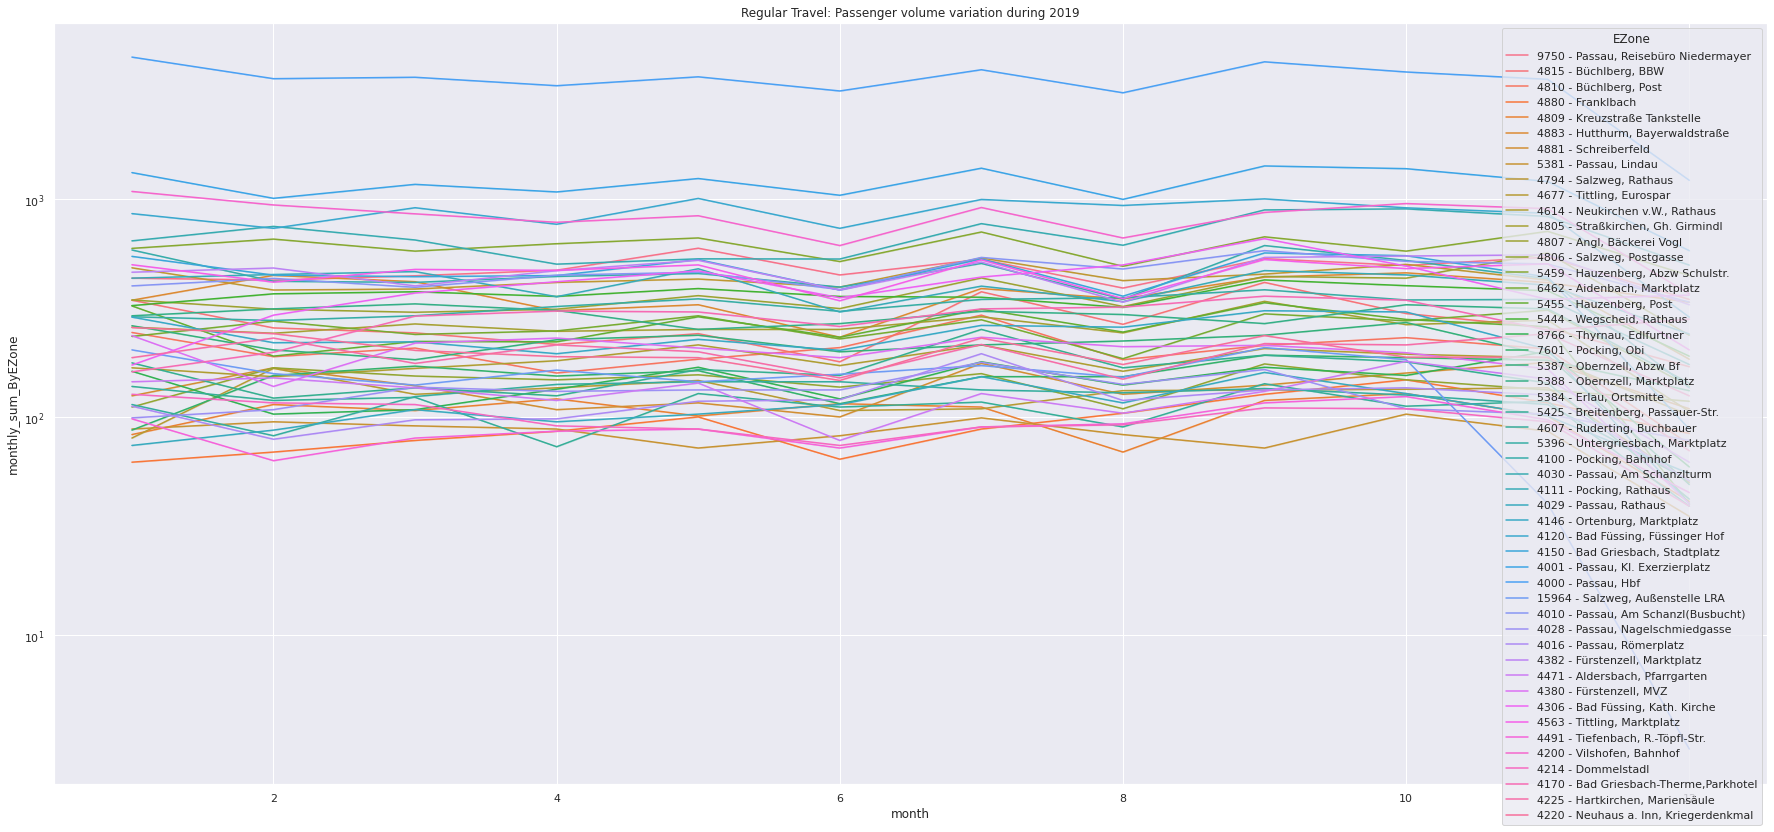

In [356]:
# Time series for "9750 - Passau, Reisebüro Niedermayer" bus stop
sns.set(rc={'figure.figsize':(30.7,14)})

fig, ax = plt.subplots()
sns.lineplot(x = df_regular_travel['month'], y = df_regular_travel['monthly_sum_ByEZone'], hue= df_regular_travel['EZone']).set(title='Regular Travel: Passenger volume variation during 2019');
ax.set_yscale("log")
# sns.lineplot(x = "date", y = "Passengers", data = df_regular_travel[df_regular_travel['EZone'] == "15964 - Salzweg, Außenstelle LRA"] )

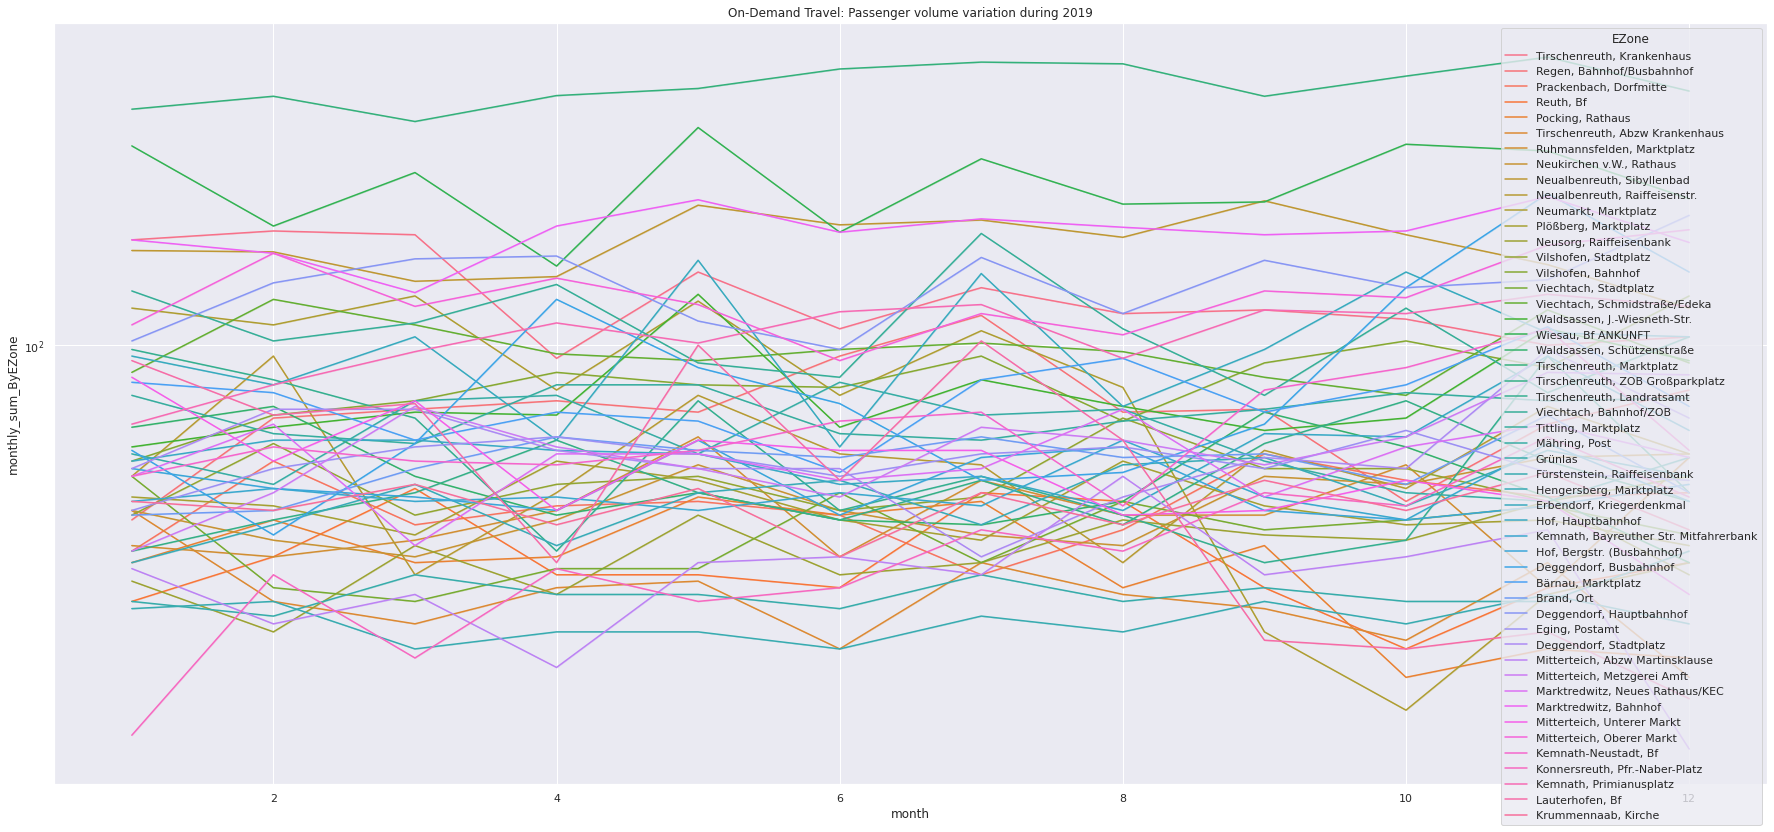

In [357]:
# Time series for "9750 - Passau, Reisebüro Niedermayer" bus stop
sns.set(rc={'figure.figsize':(30.7,14)})

fig, ax = plt.subplots()
sns.lineplot(x = df_on_demand_travel['month'], y = df_on_demand_travel['monthly_sum_ByEZone'], hue= df_on_demand_travel['EZone']).set(title='On-Demand Travel: Passenger volume variation during 2019');
ax.set_yscale("log")
# sns.lineplot(x = "date", y = "Passengers", data = df_regular_travel[df_regular_travel['EZone'] == "15964 - Salzweg, Außenstelle LRA"] )

## Clustering long and lat

### Merge Long and Lat with the dataset

In [358]:
# Add bus stop name as it is in bus_stops dataset (in the regular routes)
import re
df_regular_travel['Name'] = df_regular_travel['EZone'].apply(lambda name: name[re.sub(' +', ' ', name).find('-') + 2:])
# df_on_demand_travel['Name'] = df_on_demand_travel['EZone']

In [359]:
# Merge Lat and Long for regular routes
df_regular_travel = df_regular_travel.merge(df_bus_stops[["long", "lat", "Name"]], how='left', on='Name')
df_regular_travel.head()

,date,EZone,hour,Passengers,ind,month,Average passengers per day,total passengers per day,monthly_sum_ByEZone,Name,long,lat
0,2019-01-01,"9750 - Passau, Reisebüro Niedermayer",21,0.0,train,1,0.061667,74.0,433.0,"Passau, Reisebüro Niedermayer",13.450428,48.574233
1,2019-01-01,"4815 - Büchlberg, BBW",9,0.0,train,1,0.061667,74.0,343.0,"Büchlberg, BBW",13.518714,48.667709
2,2019-01-01,"4815 - Büchlberg, BBW",8,0.0,train,1,0.061667,74.0,343.0,"Büchlberg, BBW",13.518714,48.667709
3,2019-01-01,"4815 - Büchlberg, BBW",7,0.0,train,1,0.061667,74.0,343.0,"Büchlberg, BBW",13.518714,48.667709
4,2019-01-01,"4815 - Büchlberg, BBW",6,0.0,train,1,0.061667,74.0,343.0,"Büchlberg, BBW",13.518714,48.667709


In [360]:
df_regular_travel.drop("Name", inplace=True, axis=1)

In [361]:
df = df_regular_travel[['lat', 'long', 'Passengers']]
df = df[df['Passengers'].notna()]
df = df[df['long'].notna()]
df['Passengers_per_bus_stop'] = df.groupby(['lat', 'long'])['Passengers'].transform('sum')
df.drop('Passengers', inplace=True, axis=1)
df.head()

,lat,long,Passengers_per_bus_stop
0,48.574233,13.450428,5646.0
1,48.667709,13.518714,3257.0
2,48.667709,13.518714,3257.0
3,48.667709,13.518714,3257.0
4,48.667709,13.518714,3257.0


In [362]:
# drop duplicates
df.drop_duplicates(keep='last', inplace=True)

In [363]:
df.count()

lat                        45
long                       45
Passengers_per_bus_stop    45
dtype: int64

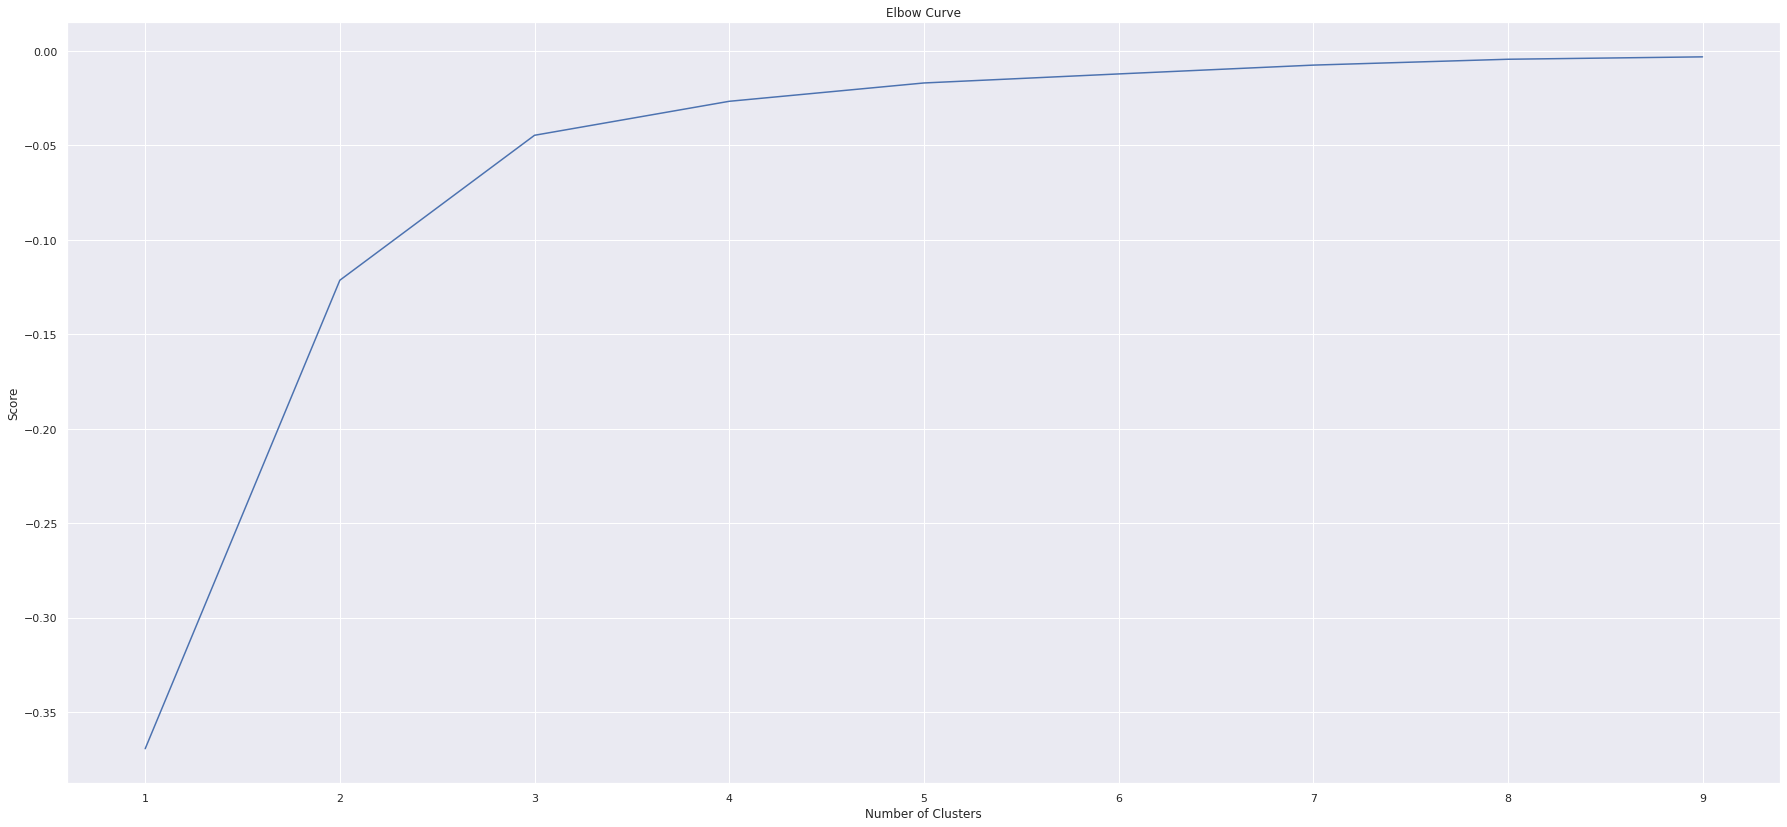

In [364]:
from sklearn.cluster import KMeans
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['lat']]
X_axis = df[['long']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [365]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(df[df.columns[0:2]]) # Compute k-means clustering.
df['cluster_label'] = kmeans.fit_predict(df[df.columns[0:2]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(df[df.columns[0:2]]) # Labels of each point
df.head(10)

,lat,long,Passengers_per_bus_stop,cluster_label
418833,48.667709,13.518714,3257.0,1
418870,48.667804,13.509534,2391.0,1
418908,48.673251,13.474553,4453.0,1
418926,48.624110,13.482425,1126.0,1
418946,48.628959,13.481417,1645.0,1
418982,48.614739,13.481511,5007.0,1
419017,48.721847,13.379180,1458.0,1
419046,48.669139,13.483620,1210.0,1
419057,48.609015,13.482593,4375.0,1
419095,48.617281,13.482958,1715.0,1


In [366]:
df.cluster_label.value_counts()

1    25
2    13
0     7
Name: cluster_label, dtype: int64

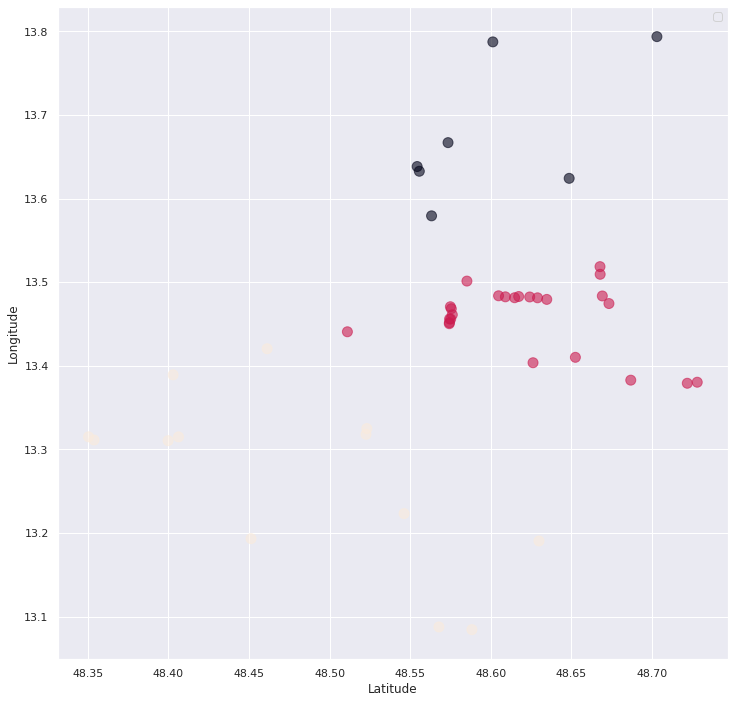

In [367]:
colors = np.array(['b.','r.','g']);
plt.figure(figsize=(12,12))
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

plt.scatter(df.lat, df.long, c=df.cluster_label, alpha = 0.6, s=100)

    
plt.legend()
plt.show()

In [370]:
# Add colors to clusters
def regioncolors(counter):
    if counter == 0:
        return 'green'
    elif counter == 1:
        return 'blue'
    elif counter == 2:
        return 'red'
df["color"] = df['cluster_label'].apply(lambda cluster: regioncolors(cluster))

In [371]:
import folium 
from folium.plugins import MarkerCluster

passau = folium.Map(location=[48.5665, 13.4312], zoom_start=10, tiles='cartodbpositron')
marker_cluster = MarkerCluster().add_to(passau)

for point in range(0, len(df)):
    folium.Marker(df.iloc[point, 0:2].values.tolist(), icon=folium.Icon(color=df.iloc[point, -1], icon_color='white', icon='male', angle=0, prefix='fa')).add_to(passau)
passau

In [372]:
df['Passengers_per_cluster'] = df.groupby(['cluster_label'])['Passengers_per_bus_stop'].transform('sum')

<AxesSubplot:xlabel='cluster_label', ylabel='Passengers_per_cluster'>

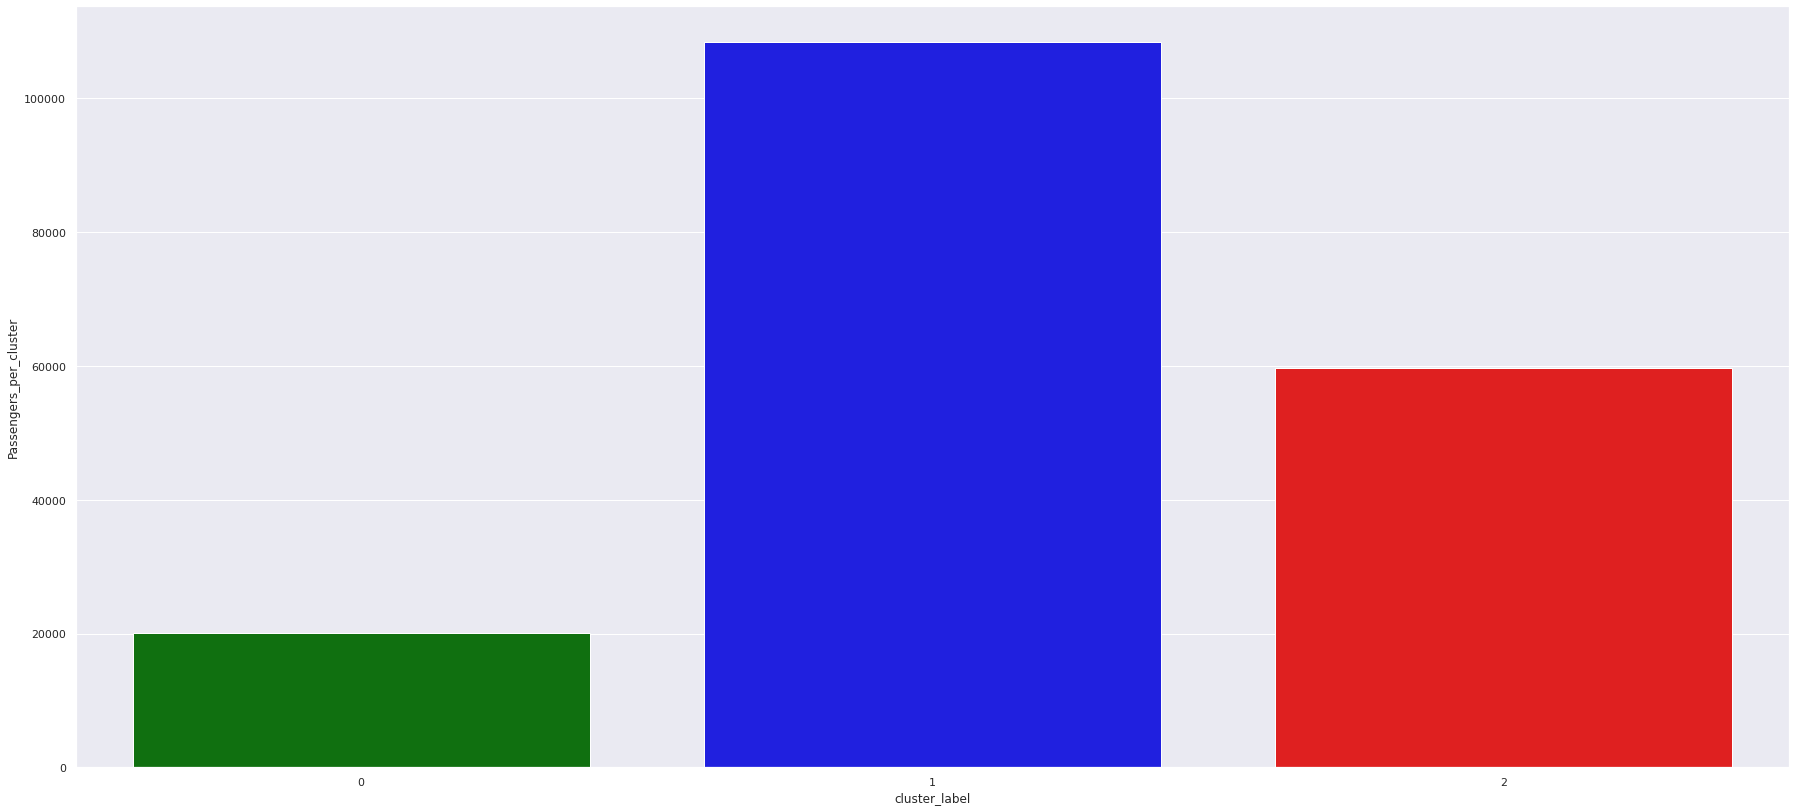

In [373]:
sns.barplot(data=df, x="cluster_label", y="Passengers_per_cluster", palette=['green', 'blue', 'red'])